<a href="https://colab.research.google.com/github/shanta-2000/Cinema-hall-ticket-purchase-prediction/blob/main/SVM_DT_RF_TASK_2022_1_60_288.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Load Data

In [68]:
df = pd.read_csv("/content/drive/MyDrive/CSE475/LAB4/cinema_hall_ticket_sales.csv")

print(df)

     Ticket_ID  Age  Ticket_Price Movie_Genre Seat_Type Number_of_Person  \
0        N4369   55         12.27      Comedy  Standard                7   
1        B8091   35         19.02       Drama  Standard            Alone   
2        V6341   55         22.52      Horror       VIP                3   
3        B3243   53         23.01       Drama  Standard                6   
4        I3814   30         21.81      Comedy       VIP                4   
...        ...  ...           ...         ...       ...              ...   
1435     E5406   41         17.09      Sci-Fi  Standard                2   
1436     C4357   19         11.45      Action  Standard            Alone   
1437     R7285   53         17.13      Comedy   Premium            Alone   
1438     W6360   34         20.25      Comedy   Premium                2   
1439     Z8034   60         21.90      Action       VIP            Alone   

     Purchase_Again  
0                No  
1               Yes  
2                No  

In [69]:
df.head(15)

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
5,E5655,28,11.58,Horror,VIP,Alone,Yes
6,P1526,50,22.91,Action,Standard,Alone,Yes
7,V4726,44,23.09,Sci-Fi,Premium,7,Yes
8,A2029,46,12.12,Sci-Fi,Standard,Alone,Yes
9,P0092,48,19.63,Action,VIP,Alone,Yes


In [70]:
df.isnull().sum()

,0
Ticket_ID,0
Age,0
Ticket_Price,0
Movie_Genre,0
Seat_Type,0
Number_of_Person,0
Purchase_Again,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticket_ID         1440 non-null   object 
 1   Age               1440 non-null   int64  
 2   Ticket_Price      1440 non-null   float64
 3   Movie_Genre       1440 non-null   object 
 4   Seat_Type         1440 non-null   object 
 5   Number_of_Person  1440 non-null   object 
 6   Purchase_Again    1440 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 78.9+ KB


In [72]:
df['Ticket_ID'].unique()

array(['N4369', 'B8091', 'V6341', ..., 'R7285', 'W6360', 'Z8034'],
      dtype=object)

In [73]:
df['Movie_Genre'].unique()

array(['Comedy', 'Drama', 'Horror', 'Action', 'Sci-Fi'], dtype=object)

In [74]:
df['Seat_Type'].unique()


array(['Standard', 'VIP', 'Premium'], dtype=object)

In [75]:
df['Number_of_Person'].unique()

array(['7', 'Alone', '3', '6', '4', '2', '5'], dtype=object)

In [76]:
df['Purchase_Again'].unique()

array(['No', 'Yes'], dtype=object)

In [77]:
# Manually map categorical values to numerical values

df_copy = df.copy()
mappings = {
    'Movie_Genre': {'Comedy':1, 'Drama':2, 'Horror':3, 'Action':4, 'Sci-Fi':5},
    'Seat_Type': {'Standard':1, 'VIP':2, 'Premium':3},
   'Number_of_Person': {'7':7, 'Alone':1, '3':3, '6':6, '4':4, '2':2, '5':5},
    'Purchase_Again': {'No':0, 'Yes':1},
}
df_copy.replace(mappings, inplace=True)
df_copy.drop('Ticket_ID', axis=1, inplace=True)
df_copy.head(5)

<ipython-input-77-ebc0a7060490>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.replace(mappings, inplace=True)


,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,55,12.27,1,1,7,0
1,35,19.02,2,1,1,1
2,55,22.52,3,2,3,0
3,53,23.01,2,1,6,1
4,30,21.81,1,2,4,1


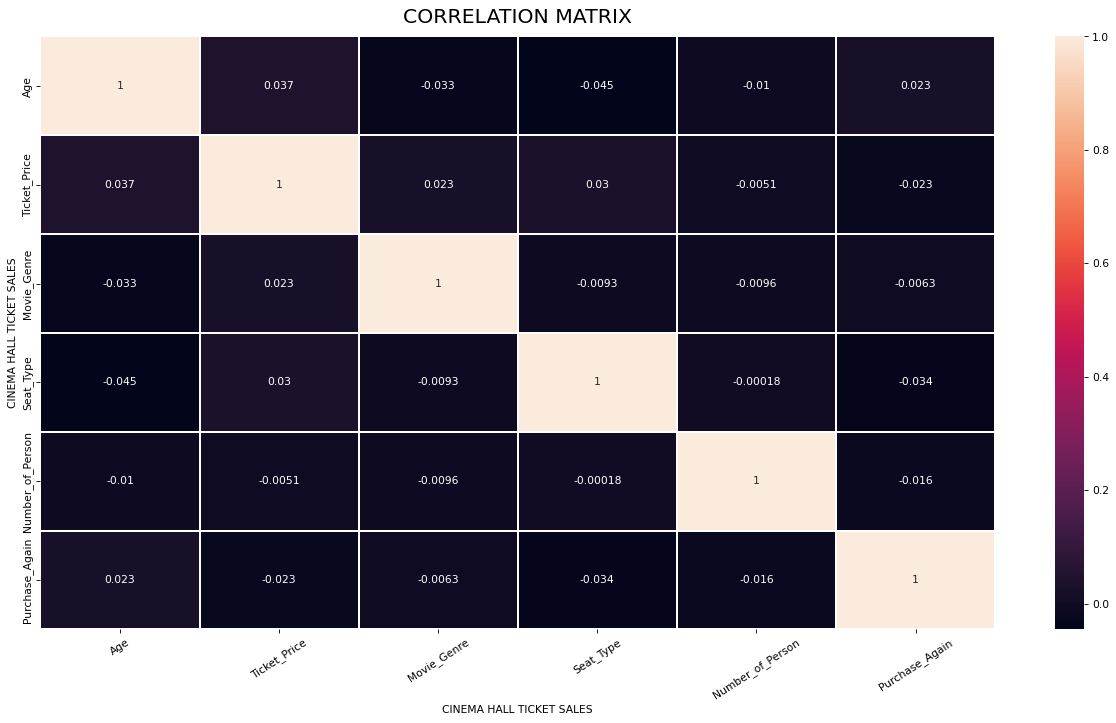

In [78]:
correlation = df_copy.corr()

plt.figure(figsize=(20,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('CINEMA HALL TICKET SALES')
plt.ylabel('CINEMA HALL TICKET SALES')
plt.xticks(rotation=33)
plt.show()

SVM MODEL

In [79]:
X=df_copy.drop(columns=['Purchase_Again'])
Y=df_copy['Purchase_Again']
print(X)
print(Y)

      Age  Ticket_Price  Movie_Genre  Seat_Type  Number_of_Person
0      55         12.27            1          1                 7
1      35         19.02            2          1                 1
2      55         22.52            3          2                 3
3      53         23.01            2          1                 6
4      30         21.81            1          2                 4
...   ...           ...          ...        ...               ...
1435   41         17.09            5          1                 2
1436   19         11.45            4          1                 1
1437   53         17.13            1          3                 1
1438   34         20.25            1          3                 2
1439   60         21.90            4          2                 1

[1440 rows x 5 columns]
0       0
1       1
2       0
3       1
4       1
       ..
1435    1
1436    0
1437    1
1438    1
1439    0
Name: Purchase_Again, Length: 1440, dtype: int64


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [81]:
from sklearn.svm import SVC

In [82]:
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [83]:
# Make predictions on the test set
y_pred1 = model.predict(X_test)

print(y_pred1)

[1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0]


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred1)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred1)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred1)
print("F1-Score:", f1)

Accuracy: 0.5115740740740741
Precision: 0.5083798882681564
Recall (Sensitivity): 0.4252336448598131
F1-Score: 0.4631043256997455


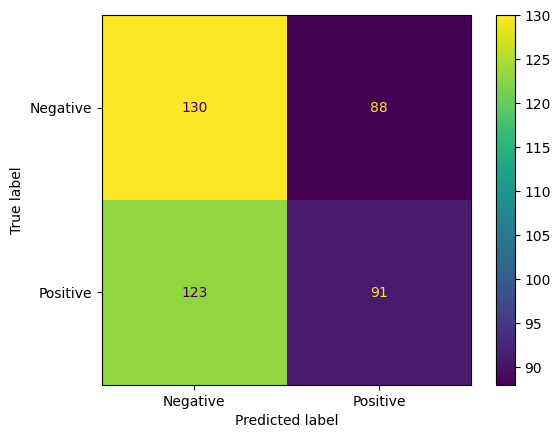

In [85]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.465 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.510 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.480 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.478 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.507 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.510 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=3)

In [88]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


The best grid search accuracy we got from the perameters where c=10,gamma=0.001 and score is 51% which is not that much helpful as a model.

In [89]:

grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.50      0.73      0.60       218
           1       0.49      0.27      0.35       214

    accuracy                           0.50       432
   macro avg       0.50      0.50      0.47       432
weighted avg       0.50      0.50      0.47       432



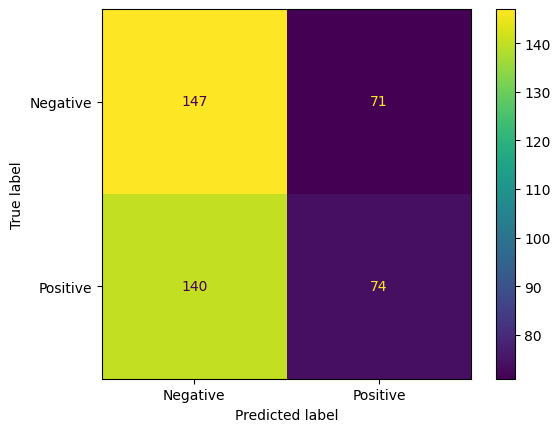

In [90]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

In [91]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],}
model = GridSearchCV(LogisticRegression(), param_grid, cv=100)
model.fit(X_train, y_train)

GridSearchCV(cv=100, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [ ]:
# Make predictions on grid search
y_pred = model.predict(X_test)

print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

In [ ]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

DECISION TREE

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,Y)

In [ ]:
features = ['Age','Ticket_Price','Movie_Genre','Seat_Type','Number_of_Person']
tree.plot_tree(dtree, feature_names=features)

In [ ]:
print(dtree.predict([[35,23,2,2,1]])),

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best Accuracy: 0.5357371558051327


from grid search on the decision tree, we can see the accuracy is higher than the svc model grid search

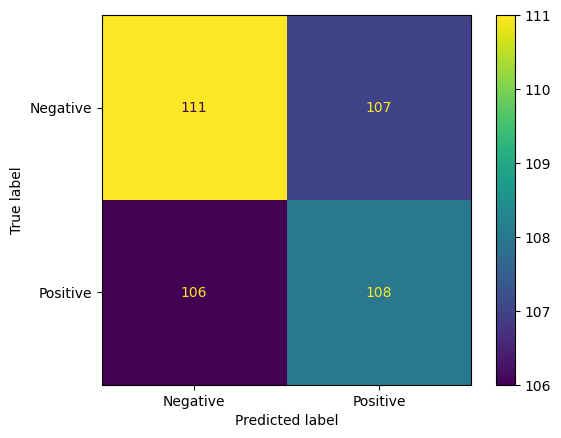

In [108]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

RANDOM FOREST MODEL

In [102]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [104]:
_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5069


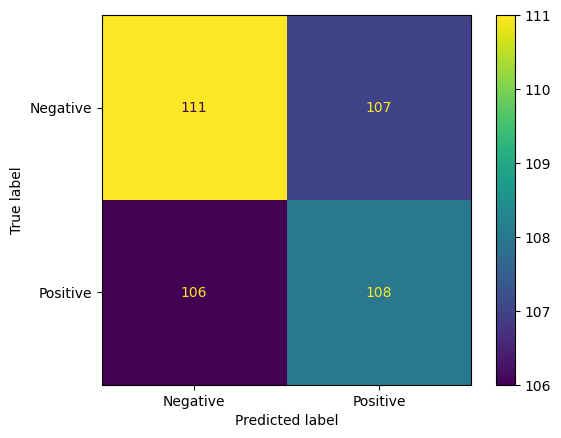

In [105]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()